# Introduction to Machine Learning


**Machine Learning** focus on the study and construction of systems that can learn from data.
The main problem is find patterns, relation and regularities about the data, which can let us build descriptive and predictive models. 

one of all uses of **ML** is spam detection.

To build a model, you must have two key concepts, the first is model must perform a **Automatic Sorting Process**, without the user explicitly specifying the way in which the classification is carried out.

For example, the model receives examples of emails that are spam and examples of emails that are not. The second concept is that the model must be capable of **generalization**, that is, the model must be able to predict data never seen before. In the example of spam filtering, we are interested in automatically classifying the emails that arrive in the user's inbox.

Next, we will address a binary classification problem about a subset of the IRIS dataset.

# A two-class classification problem

The following code will load a data set (IRIS) that will serve to illustrate what a classification problem consists of and how to solve it with a machine learning model. For now we are not going to worry about where the data comes from and how it is processed (this will be discussed in the next session).

Next, we will load all the necessary libraries to work on the notebook:

In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
from sklearn import preprocessing
from sklearn import datasets
from io import BytesIO
from PIL import Image

The next line loads the IRIS flower dataset

In [2]:
iris = datasets.load_iris()

In the following function, the data can be graphed by choosing two characteristics from the Iris database.

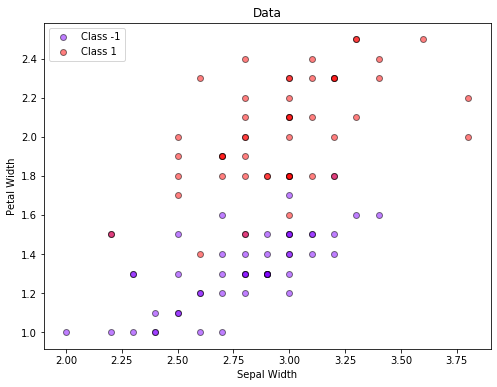

In [4]:
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  color=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

y = 2*iris.target[iris.target != 0] - 3
X_noscale = iris.data[:,[1, 3]]
X_noscale = X_noscale[iris.target != 0, :]
X = preprocessing.scale(X_noscale)


pl.figure(figsize=(8, 6))
pl.xlabel('Sepal Width')
pl.ylabel('Petal Width')
plot_data(X_noscale, y)

The data must be presented as two-dimensional arrays of numbers. Each row corresponds to a training instance, about which we want to learn or make a prediction about its data.

Let's check the size of each built array

In [5]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [6]:
np.unique(y, return_counts=True)

(array([-1,  1]), array([50, 50], dtype=int64))

We observe that each class has 50 examples in total. Data in one class is represented by a positive label, 1, and data in the other class by a negative label, -1.

In [7]:
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## Question
**How do we automatically differentiate between the two classes?**

In other words, if you give me a new example, I want to be able to classify it into one of these two classes.

# Classification using a linear model

## Linear discrimination

* Our classification model is a function that receives an example $x$ and returns the prediction. This function is based on a function (called discriminant) $f:\mathbb{R}^{2} \rightarrow \mathbb{R}$ such that:
$$\textrm{Prediction}(x) = \begin{cases}
C_{1} & \mbox{if} f (x) \ge \theta \\
C_{2} & \mbox{if} f (x) < \theta
\end{cases} $$

* In the case of linear discrimination, we define $f$ as a linear model with parameters $w$ and $w_0$:
$$f(x) = wx + w_0 $$

### Problems

* **How to find $f$?**

* **How do we estimate $w$ and $w_0$?**

## Loss functions

Loss is the penalty for a wrong prediction. In other words, the loss indicates how wrong the prediction of a model was in an example. If my model's prediction is perfect, the loss is **zero**, otherwise the loss is going to be a number greater than zero.

A very common loss function is quadratic loss:
$$ L (f, D) = \sum_{(x_{i}, r_{i}) \in D}(r_i - f (x_i))^2 $$

where:
* $ (x_ {i}, r_ {i}) $ is an example in which $ x_i $ corresponds to a set of characteristics, in our data set, it corresponds to the 2 characteristics extracted from a flower (sepal width and petal width). These characteristics are used by the model to make predictions. $ r_i $ corresponds to the label of the example, for example the species of the flower.
* $ f (x_i) $ corresponds to the prediction function that we previously defined. This function is of the form $ f (x) = wx + w_0 $.
* $ D $ corresponds to the dataset made up of several annotated examples.

## Learning as optimization

* Estimating the parameters $ w $ and $ w_0 $ can be approached as an optimization problem that consists of:
$$ \min_{f \in H} L (f, D) $$
where $ L (f, D) $ is the quadratic loss function. This is summarized by finding a function $ f $ that generates the minimum average loss value with respect to all the examples in the data set.
* The $ f $ function comes from a set of functions called the hypothesis space:
$$ H = \{f_w (x, y) = wx + w_0, \forall w \in \mathbb{R} ^ n \ y \ w_0 \in \mathbb {R} \} $$
where $ w $ and $ w_0 $ are the coefficients of the function $ f (x) = wx + w_0 $.
* The loss function helps us to estimate how bad a function $ f $ in the hypothesis space behaves with respect to the data set $ D $.

Next, we define the prediction and loss functions in Python, for our problem.

In [8]:
def predict(w, x):
    a = np.dot(w[1:], x) + w[0]
    return a

In [9]:
def square_loss(w, x, y):
    return (y - predict(w, x)) ** 2 / 2

def batch_loss(loss_fun, w, X, Y):
    n = X.shape[0]
    tot_loss = 0
    for i in range(n):
        tot_loss += loss_fun(w, X[i], Y[i])
    return tot_loss

Suppose $ w $ and $ w_0 $:
* $ w = [5, 2] $
* $ w_0 = 1 $

We choose the first example from our Iris dataset:

In [11]:
w = [1, 5, 2] # For ease, w [0] equals w_0
x = X[0] # First example of our IRIS dataset.
label = y[0]

print('Features: {}'.format(X[0]))
print('Label: {}'.format(y[0]))
print('Discriminant function: {}'.format(predict(w, x)))


Features: [ 0.99068792 -0.65303909]
Label: -1
Discriminant function: 4.647361438018154


Since the value of the discriminant function is $ f (x) > 0 $, the predicted class is positive.
Now, we estimate the loss value using those values of $ w $ and $ w_0 $

In [12]:
print('Loss: {}'.format(square_loss(w, x, label)))

Loss: 15.946345605807238


What happens if we modify one of the $ w $ parameters?

In [13]:
w_p = [1, 5, 3]

print('Label: {}'.format(y[0]))
print('Prediction: {}'.format(predict(w_p, x)))
print('Loss w_p: {}'.format(square_loss(w_p, x, label)))

Label: -1
Prediction: 3.9943223502437437
Loss w_p: 12.471627869072096


We note that our loss dropped from $15.94$ to $12.47$. However, we are interested in automating this process. Let's first look at how the quadratic loss function behaves.

## Analyzing the quadratic loss function

Next, we define a couple of python functions to be able to visualize the loss function

In [14]:
def plot_loss(loss):
    w1_vals = np.linspace(-5, 5, 30)
    w2_vals = np.linspace(-5, 5, 30)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    grid_r, grid_c = W1.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = loss(W1[i, j], W2[i, j])
    pl.contourf(W1, W2, ZZ,30, cmap = pl.cm.jet)
    pl.colorbar()
    pl.xlabel("w1")
    pl.ylabel("w2")

def bloss_square(w1, w2):
    w = np.array([1, w1, w2])
    return batch_loss(square_loss, w, X, y)

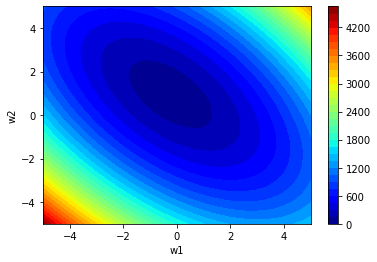

In [15]:
plot_loss(bloss_square)

Interpretation: We observe that the minimum value of our loss function is around:
* $ w_1 = 0.0 $
* $ w_2 = 1.0 $

## How to solve the learning problem?

* There are several approaches:
     * Linear optimization
     * Convex optimization
     * Non-linear optimization
     * Combinatorial optimization
* There is no optimization strategy that works for all problems. [No free lunch theorem] (https://en.wikipedia.org/wiki/No_free_lunch_theorem)
* **In this case we are going to use a descending gradient**

## Descending gradient

* Advantages:
   * Guaranteed global optimum
   * Simplicity of the method
   * Ease to adjust parameters
   * Scalability
   * Potential parallelization.
* In machine learning, preferences change over time.
* Today it is scalable. Inclusively, the parallelizable strategies are preferred knowing the guaranteed optimality.

Minimizing the function $ L (f, D) $, where $ f $ is our prediction function turns out to be a convex problem, i.e. there is only one place where the slope of the loss curve equals zero. That minimum value is where our loss function $ L $ **converges**.

On the other hand, calculating the value of the loss function for each possible value of $ w $ on the data set is a very inefficient way of finding that convergence value. Downward gradient is an iterative mechanism that allows us to find that convergence value.

<img src="https://i.stack.imgur.com/JcfpK.png">

### Descending gradient algorithm:

* Step 1: We choose an initial value or starting point. It can be zero or a random value. This initial value is not relevant to this problem.
* Step 2: We calculate the **gradient of the loss function** for the starting point. The gradient of the loss indicates the derivative (inclination) of the curve. The gradient in turn is a vector, therefore it has **direction** and **magnitude**, this direction always points towards where the greatest increase in the loss function is generated.
* Step 3: We calculate a new value $ w $ changing it in the negative direction of the gradient, with the aim of reducing the loss as soon as possible.
* Step 4: The new value of $ w $ will also be determined by the magnitude of the gradient and a **learning rate** $ \eta $. For example, if the magnitude of the gradient is 2.5 and the learning rate is 0.01, the descending gradient will choose a point $ w $ that is 0.025 units away from the previous point $ w $. For the calculation of $ w $ we will use the following formula:
$$
w = w - \eta \frac {\partial L} {\partial w}
$$
* Repeat from Step 1.

#### Problems

* What if the size of our step is very large and does not reach the local minimum?


<img src="http://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/images/gradient_descent/figure3.png" height="310" width="280">


Choosing a high learning rate can end in never reaching the point of convergence. But a very small rate can take a long time to reach the global minimum





### How is the gradient calculated?

$$
\begin{aligned} L (f, D) & = \sum _ {(x_{i}, r_{i}) \in D} (r_i - f(x_i)) ^ 2 \\
  & = \sum _{(x_{i}, r_{i}) \in D} E (w, x_i, r_i)
\end {aligned}
$$
If $ f_w $ is the function we defined before:
$$
\frac {\partial E (w, x_{i,} r_{i})} {\partial w} = (f_{w} (x_{i}) - r_{i}) x_{i}
$$

Next, we define a function `de_dw` that corresponds to the partial derivatives of $ E $ with respect to the coefficients $ w $.

In [18]:
def de_dw(w, x, r):
    x_prime = np.zeros(len(x) + 1)
    x_prime[1:] = x
    x_prime[0] = 1
    return (predict(w, x) - r) * x_prime

## Batch descending gradient

To estimate the gradient, we do it across all of our data sets. Since we only have 100 examples, it is relatively quick to do this calculation. However, in practice it can be inefficient if you have a large number of training examples.

Next, the function is defined for the descending gradient in batch:

In [19]:
def batch_gd(X, Y, epochs, eta, w_ini):
    """
     X: instances of the dataset
     Y: dataset labels
     epochs: number of iterations to run descending gradient
     eta: learning cup
     w_ini: initial w and w_0
    
    """
    losses = []
    w = w_ini 
    n = X.shape[0]
    for i in range(epochs): 
        delta = np.zeros(len(w))
        for j in range(n):
            delta += de_dw(w, X[j], Y[j]) # We are adding the gradient for each example in the data set
        w = w - eta * delta # We calculate the new value of w
        losses.append(batch_loss(square_loss, w, X, Y)) # We are saving the loss value to display later
    return w, losses

We will execute descending gradient in batch with the following parameters:
* $ epochs = $ 50
* $ w_0 = 0 $ ($ w_0 $ initial)
* $ w = [0, 0] $ (initial $ w $)
* $ \ eta = 0.01 $ (learning fee)

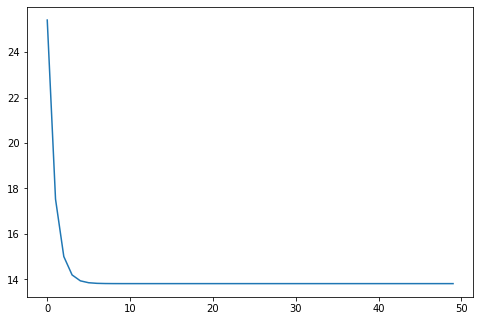

In [20]:
w, losses = batch_gd(X, y, 50, 0.01, np.array([0, 0, 0]))
pl.figure(figsize = (8,16/3))
pl.plot(losses)

# Stochastic downward gradient (SGD)


When working with large data sets, computing the gradient over the entire data set becomes impractical. One way to decrease computing time is by choosing random samples from our data set, which generate an average estimate of the average gradient. SGD then takes one sample randomly at a time and estimates the value of the gradient for that sample. Despite being loud, SGD works quite well in practice.

The function for the stochastic downward gradient is defined below:

In [21]:
 def sgd(X, Y, epochs, eta, w_ini):
    """
     X: instances of the dataset
     Y: dataset labels
     epochs: number of iterations to run
             descending gradient
     eta: learning rate
     w_ini: initial w and w_0
    
    """
    losses = []
    w = w_ini
    n = X.shape[0]
    for i in range(epochs):
        for j in range(n):
            delta = de_dw(w, X[j], Y[j]) # Here we estimate the gradient for each element but not for the entire dataset
            w = w - eta * delta
        losses.append(batch_loss(square_loss, w, X, Y))
    return w, losses

Next, we compare the behavior of Downward Gradient in Batch and Stochastic. We observe that they behave similarly for our two-class classification problem.

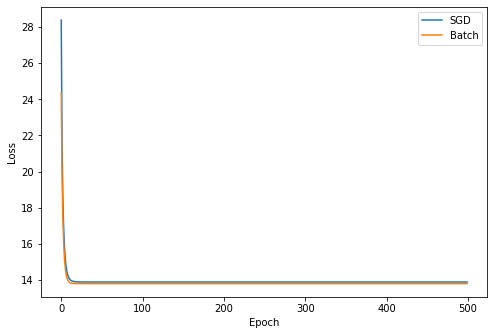

In [22]:
lr = 0.005
epochs = 500
w1, losses_bt = batch_gd(X, y, epochs, lr, np.array([0, 0, 0])) #Batch
w2, losses_ol = sgd(X, y, epochs, lr, np.array([0, 0, 0])) #SGD
pl.figure(figsize = (8,16/3))
pl.plot(np.arange(epochs), losses_ol, label="SGD")
pl.plot(np.arange(epochs), losses_bt, label="Batch")
pl.xlabel("Epoch")
pl.ylabel("Loss")
pl.legend()

## Prediction function display

It is useful to be able to visualize which regions of our space in 2D are assigned to the positive class and the negative class. For that we write a function that allows us to visualize the decision region of our classifiers, as follows:

In [23]:
def plot_decision_region(X, pred_fun):
    """
    X: corresponds to the instances of our data set
    pred_fun: is a function that returns a prediction for each value of X
    """
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

In [24]:
def gen_pred_fun(w):
    def pred_fun(x1, x2):
        x = np.array([x1, x2])
        return predict(w, x)
    return pred_fun

Let's visualize the case where our coefficients are of the form:
* $w_0 = 0$
* $w = [0.6, 1]$

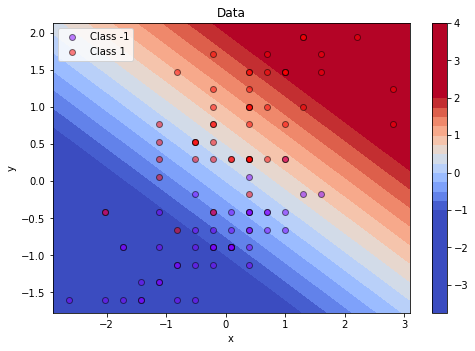

In [25]:
w = [0, 0.6, 1]

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(w))
plot_data(X, y)

Nothing useful, however if we visualize the result after applying SGD:

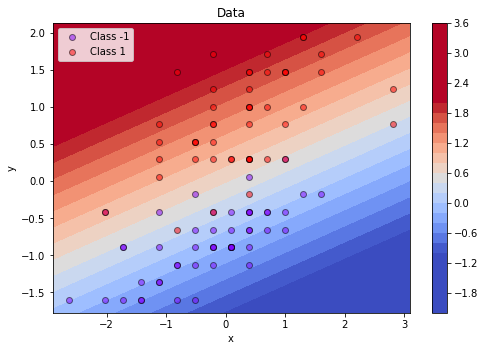

In [26]:
lr = 0.5
epochs = 500
w, _ = sgd(X, y, epochs, lr, np.array([0, -1, 2])) #SGD

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(w))
plot_data(X, y)

In [27]:
w

array([ 0.61344313, -0.32989191,  0.91922391])